# Recurrent Neural Networks Demo

Author: Runshan Fu (Fall 2017 95-865 TA), George H. Chen

In this demo, we will implement RNN models for sentiment analysis on IMDB reviews. We will start from the original review texts and predict the sentiment (positive or negative) for each review. This demo is borrowed from the book *Deep Learning with Python* by Francois Chollet and also uses code from user `mdaoust` in [this stackoverflow post](https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [2]:
import csv
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
with open('socialmedia-disaster-tweets-DFE-cleaned2.csv', newline='', encoding="utf8", errors='ignore') as csvfile:
    data = list(csv.reader(csvfile))

data = np.array(data)
data.shape

(10876, 2)

In [4]:
#create words dictionary
string = ''
for i in range(data.shape[0]):
    string = string + ' ' + data[i][1]

def get_words_dict(text):
    i = 3
    dictionary = {}
    for word in text.split():
        if word not in dictionary.keys():
            dictionary[word] = i
            i += 1
    return dictionary

word_index = get_words_dict(string)
word_index

{'Just': 3,
 'happened': 4,
 'a': 5,
 'terrible': 6,
 'car': 7,
 'crash': 8,
 'Our': 9,
 'Deeds': 10,
 'are': 11,
 'the': 12,
 'Reason': 13,
 'of': 14,
 'this': 15,
 '#earthquake': 16,
 'May': 17,
 'ALLAH': 18,
 'Forgive': 19,
 'us': 20,
 'all': 21,
 'Heard': 22,
 'about': 23,
 'is': 24,
 'different': 25,
 'cities,': 26,
 'stay': 27,
 'safe': 28,
 'everyone.': 29,
 'there': 30,
 'forest': 31,
 'fire': 32,
 'at': 33,
 'spot': 34,
 'pond,': 35,
 'geese': 36,
 'fleeing': 37,
 'across': 38,
 'street,': 39,
 'I': 40,
 'cannot': 41,
 'save': 42,
 'them': 43,
 'Forest': 44,
 'near': 45,
 'La': 46,
 'Ronge': 47,
 'Sask.': 48,
 'Canada': 49,
 'All': 50,
 'residents': 51,
 'asked': 52,
 'to': 53,
 "'shelter": 54,
 'in': 55,
 "place'": 56,
 'being': 57,
 'notified': 58,
 'by': 59,
 'officers.': 60,
 'No': 61,
 'other': 62,
 'evacuation': 63,
 'or': 64,
 'shelter': 65,
 'place': 66,
 'orders': 67,
 'expected': 68,
 '13,000': 69,
 'people': 70,
 'receive': 71,
 '#wildfires': 72,
 'California': 73,


In [5]:
len(word_index)

41665

In [6]:
new_data = []

for i in range(data.shape[0]):
    lst = []
    for word in data[i][1].split():
        lst.append(word_index[word])
    new_data.append(lst)
new_data = np.array(new_data)

In [7]:
#vocab_size = 1000
vocab_size = len(word_index)+3
train_size = 8000
val_size = 2876
trainX = new_data[0:train_size]
trainY = data[0:train_size,0]
valX = new_data[train_size:(train_size+val_size)]
valY = data[train_size:(train_size+val_size),0]

In [8]:
#INDEX_FROM = 2
word_to_idx = word_index
#word_to_idx = {word:(word_idx + INDEX_FROM) for word, word_idx in word_to_idx.items()}
word_to_idx = {word:word_idx for word, word_idx in word_to_idx.items()}
word_to_idx['<PAD>'] = 0
word_to_idx['<START>'] = 1
word_to_idx['<UNK>'] = 2

idx_to_word = {word_idx:word for word, word_idx in word_to_idx.items()}

# turn the lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
x_train = sequence.pad_sequences(trainX, maxlen=30)
x_test = sequence.pad_sequences(valX, maxlen=30)
y_train = trainY
y_test = valY

In [9]:
idx_to_word

{3: 'Just',
 4: 'happened',
 5: 'a',
 6: 'terrible',
 7: 'car',
 8: 'crash',
 9: 'Our',
 10: 'Deeds',
 11: 'are',
 12: 'the',
 13: 'Reason',
 14: 'of',
 15: 'this',
 16: '#earthquake',
 17: 'May',
 18: 'ALLAH',
 19: 'Forgive',
 20: 'us',
 21: 'all',
 22: 'Heard',
 23: 'about',
 24: 'is',
 25: 'different',
 26: 'cities,',
 27: 'stay',
 28: 'safe',
 29: 'everyone.',
 30: 'there',
 31: 'forest',
 32: 'fire',
 33: 'at',
 34: 'spot',
 35: 'pond,',
 36: 'geese',
 37: 'fleeing',
 38: 'across',
 39: 'street,',
 40: 'I',
 41: 'cannot',
 42: 'save',
 43: 'them',
 44: 'Forest',
 45: 'near',
 46: 'La',
 47: 'Ronge',
 48: 'Sask.',
 49: 'Canada',
 50: 'All',
 51: 'residents',
 52: 'asked',
 53: 'to',
 54: "'shelter",
 55: 'in',
 56: "place'",
 57: 'being',
 58: 'notified',
 59: 'by',
 60: 'officers.',
 61: 'No',
 62: 'other',
 63: 'evacuation',
 64: 'or',
 65: 'shelter',
 66: 'place',
 67: 'orders',
 68: 'expected',
 69: '13,000',
 70: 'people',
 71: 'receive',
 72: '#wildfires',
 73: 'California',


In [10]:
print(x_train.shape)

(8000, 30)


In [11]:
print(y_train.shape)

(8000,)


In [12]:
x_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 4, 5, 6, 7, 8], dtype=int32)

In [13]:
print(' '.join(idx_to_word[idx] for idx in x_train[0]))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> Just happened a terrible car crash


## Use pre-trained word embeddings
We use GloVe embeddings instead of learning our own task-specific word embedding. First download the pre-computed embeddings from 2014 English Wikipedia on https://nlp.stanford.edu/projects/glove/ (specifically the one with 6 billion tokens, `globe.6B.zip`). Unzip it (so that `glove.6B.100d.txt` is located in the directory `./glove/`).

We first create a dictionary that maps each English word to its corresponding 100-dimensional GloVe embedding.

In [14]:
word_to_embedding = {}

# we will use the 100-dimensional embedding vectors
with open("./glove.6B.100d.txt") as f:
    # each row represents a word vector
    for line in f:
        values = line.split()
        # the first part is word
        word = values[0]
        # the rest of the values form the embedding vector
        embedding = np.asarray(values[1:], dtype='float32')
        word_to_embedding[word] = embedding

print('Found %s word vectors.' % len(word_to_embedding))

Found 400000 word vectors.


Next, we create an embedding matrix, where the i-th row holds the GloVe embedding for the i-th top word (except where i=0 is the special padding token `<PAD>`, i=1 is the special `<START>` token, and i=2 is the special `<UNK>` token; for these special cases the embedding vector is left as all zeros).

In [15]:
embedding_dim = 100

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for idx in range(vocab_size):
    word = idx_to_word[idx]
    if word in word_to_embedding:
        embedding_matrix[idx] = word_to_embedding[word]

In [16]:
embedding_matrix.shape

(41668, 100)

## Feedforward network with embeddings

This first neural net is *not* a recurrent neural net. It does not do anything special to account for time series structure. This net is meant to be a baseline that we compare a recurrent neural net against. To make the comparison somewhat fair, in both cases, the last two layers have the same output dimensions: the second-to-last layer is a Dense layer with 64 neurons and `relu` activation, and the last layer is a Dense layer with 1 neuron and `sigmoid` activation.

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# initialize the model
feedforward_model = Sequential()
feedforward_model.add(Embedding(vocab_size, embedding_dim, input_length=30))
feedforward_model.add(Flatten())
feedforward_model.add(Dense(64, activation='relu'))
feedforward_model.add(Dense(1, activation='sigmoid'))
feedforward_model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           4166800   
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                192064    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,358,929
Trainable params: 4,358,929
Non-trainable params: 0
_________________________________________________________________


In [18]:
# load the GloVe embeddings in the model
feedforward_model.layers[0].set_weights([embedding_matrix])
# set the embedding layer to be not trainable, so the weights do not change during the training
feedforward_model.layers[0].trainable = False

feedforward_model.summary()  # the summary changes after we turn off training for the 0-th layer (note the last line "Non-trainable params")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           4166800   
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                192064    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,358,929
Trainable params: 192,129
Non-trainable params: 4,166,800
_________________________________________________________________


In [19]:
# compile and train the model
feedforward_model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['acc'])

history = feedforward_model.fit(x_train, y_train,
                                validation_split=0.2,
                                epochs=10,
                                batch_size=32)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 9s 1ms/step - loss: 0.5631 - acc: 0.7113 - val_loss: 0.5858 - val_acc: 0.7225
Epoch 2/10
6400/6400 [==============================] - 7s 1ms/step - loss: 0.4470 - acc: 0.7906 - val_loss: 0.5868 - val_acc: 0.7069
Epoch 3/10
6400/6400 [==============================] - 6s 1ms/step - loss: 0.3670 - acc: 0.8386 - val_loss: 0.6554 - val_acc: 0.6950
Epoch 4/10
6400/6400 [==============================] - 7s 1ms/step - loss: 0.3012 - acc: 0.8744 - val_loss: 0.7159 - val_acc: 0.6775
Epoch 5/10
6400/6400 [==============================] - 7s 1ms/step - loss: 0.2522 - acc: 0.8981 - val_loss: 0.7505 - val_acc: 0.6769
Epoch 6/10
6400/6400 [==============================] - 7s 1ms/step - loss: 0.2171 - acc: 0.9134 - val_loss: 0.7933 - val_acc: 0.6650
Epoch 7/10
6400/6400 [==============================] - 7s 1ms/step - loss:

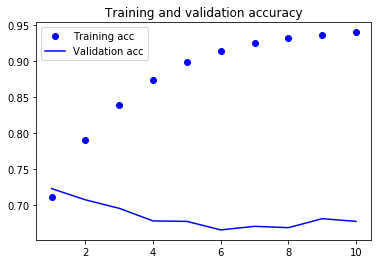

In [20]:
# plot the accuracy rates for each epoch on training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
rnn_model = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dim, input_length=30))
rnn_model.add(LSTM(64))
rnn_model.add(Dense(1, activation='sigmoid'))

# load the GloVe embeddings in the model
rnn_model.layers[0].set_weights([embedding_matrix])
rnn_model.layers[0].trainable = False

rnn_model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 100)           4166800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,209,105
Trainable params: 42,305
Non-trainable params: 4,166,800
_________________________________________________________________


In [23]:
# compile and train the model
rnn_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
history = rnn_model.fit(x_train, y_train,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=32)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 43s 7ms/step - loss: 0.5542 - acc: 0.7195 - val_loss: 0.5563 - val_acc: 0.7362
Epoch 2/10
6400/6400 [==============================] - 42s 7ms/step - loss: 0.5144 - acc: 0.7497 - val_loss: 0.5541 - val_acc: 0.7294
Epoch 3/10
6400/6400 [==============================] - 39s 6ms/step - loss: 0.5014 - acc: 0.7587 - val_loss: 0.5507 - val_acc: 0.7312
Epoch 4/10
6400/6400 [==============================] - 40s 6ms/step - loss: 0.4872 - acc: 0.7655 - val_loss: 0.5694 - val_acc: 0.7000
Epoch 5/10
6400/6400 [==============================] - 36s 6ms/step - loss: 0.4738 - acc: 0.7720 - val_loss: 0.5594 - val_acc: 0.7312
Epoch 6/10
6400/6400 [==============================] - 37s 6ms/step - loss: 0.4636 - acc: 0.7811 - val_loss: 0.5810 - val_acc: 0.7063
Epoch 7/10
6400/6400 [==============================] - 37s 6ms/step - loss: 0.4499 - acc: 0.7869 - val_loss: 0.5677 - val_acc: 0.7312
Epoch 8

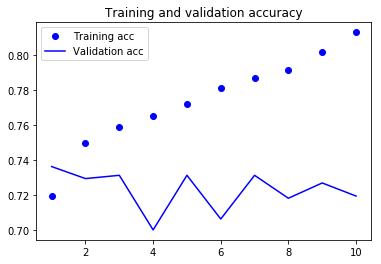

In [24]:
# plot the accuracy rates for each epoch on training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Finally evaluate on test data

We now compare the test set raw classification accuracies of the feedforward neural net vs the LSTM model. Keep in mind that we have set both of these models up so that right before the final logistic regression classification layer, we are representing each review as a feature vector of length 64. The LSTM model learns a much better 64-dimensional feature space to use (as evidenced by its dramatically higher prediction accuracy on the test set).

In [22]:
test_loss, test_acc = feedforward_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

2876/2876 [==============================] - 2s 555us/step
Test accuracy: 0.690890125256752


In [25]:
test_loss, test_acc = rnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

2876/2876 [==============================] - 6s 2ms/step
Test accuracy: 0.7159248958542549
